# indian liver patient

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv('indian_liver_patient.csv')

In [145]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [146]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [137]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


# EDA 

<AxesSubplot:xlabel='Dataset', ylabel='count'>

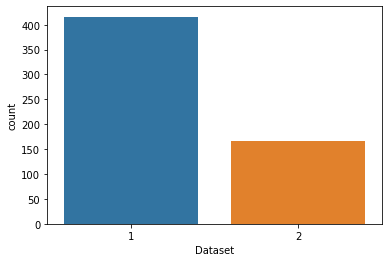

In [6]:
sns.countplot(data=df,x='Dataset')

<AxesSubplot:>

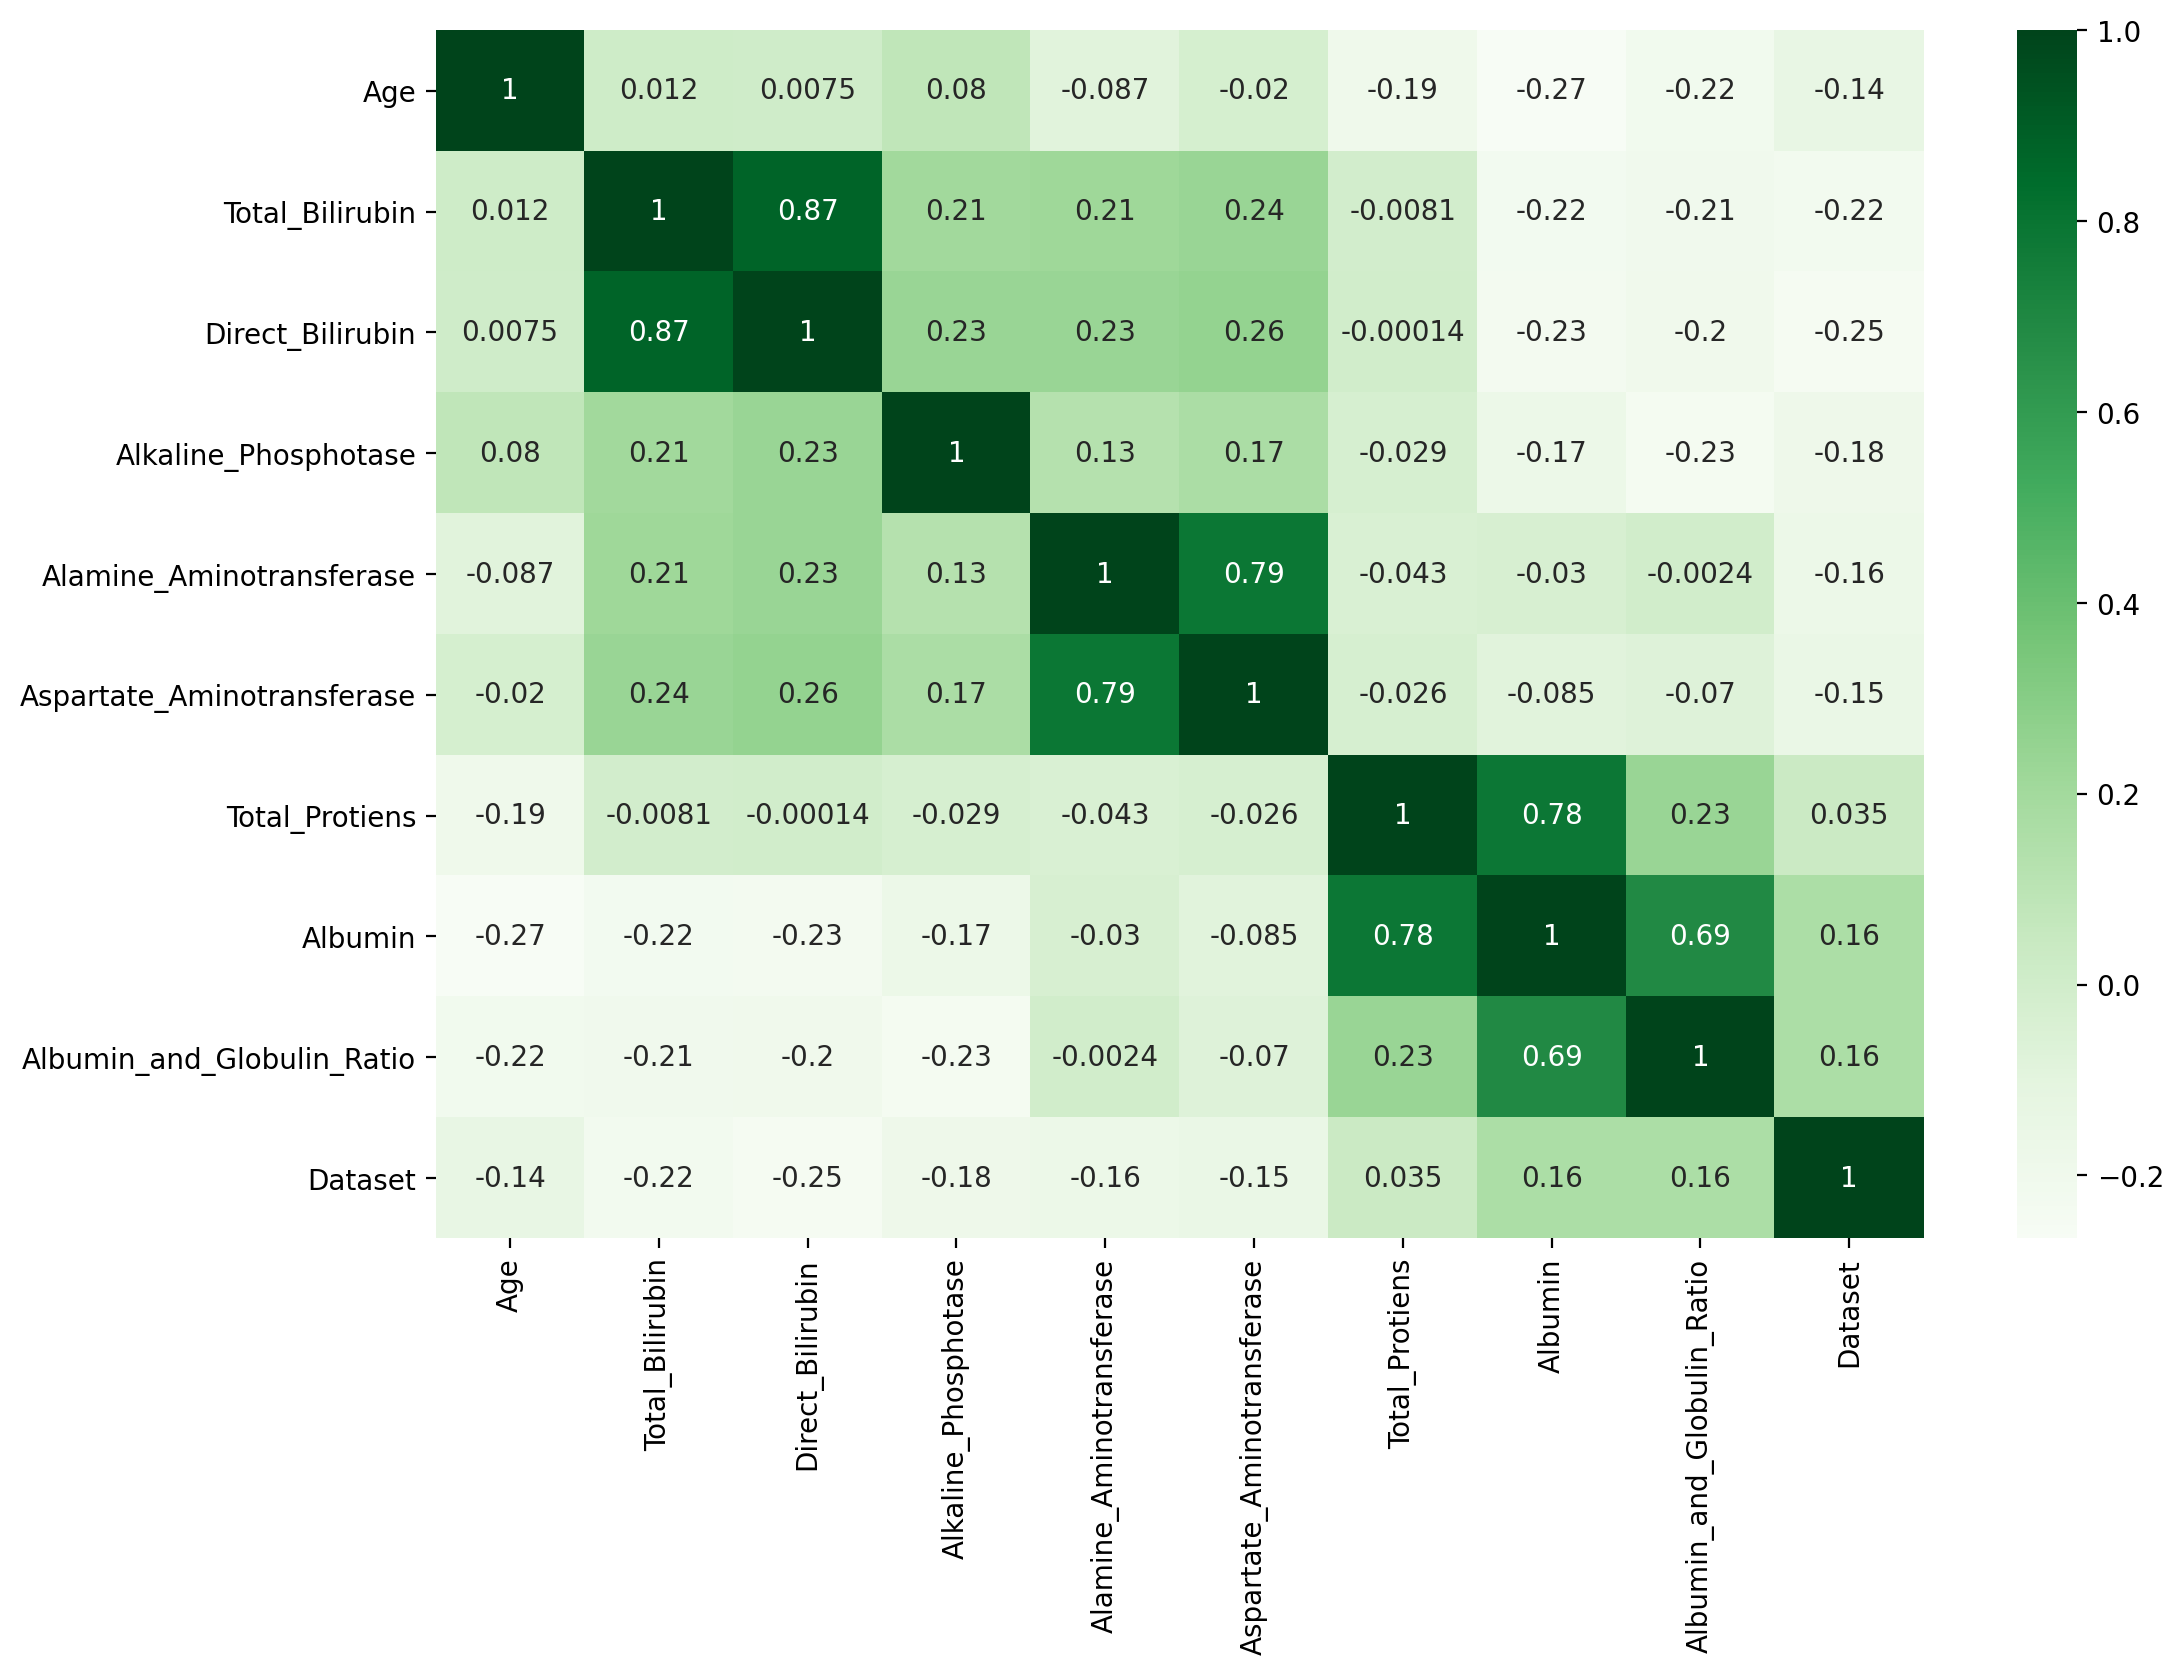

In [17]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap="Greens")

<AxesSubplot:>

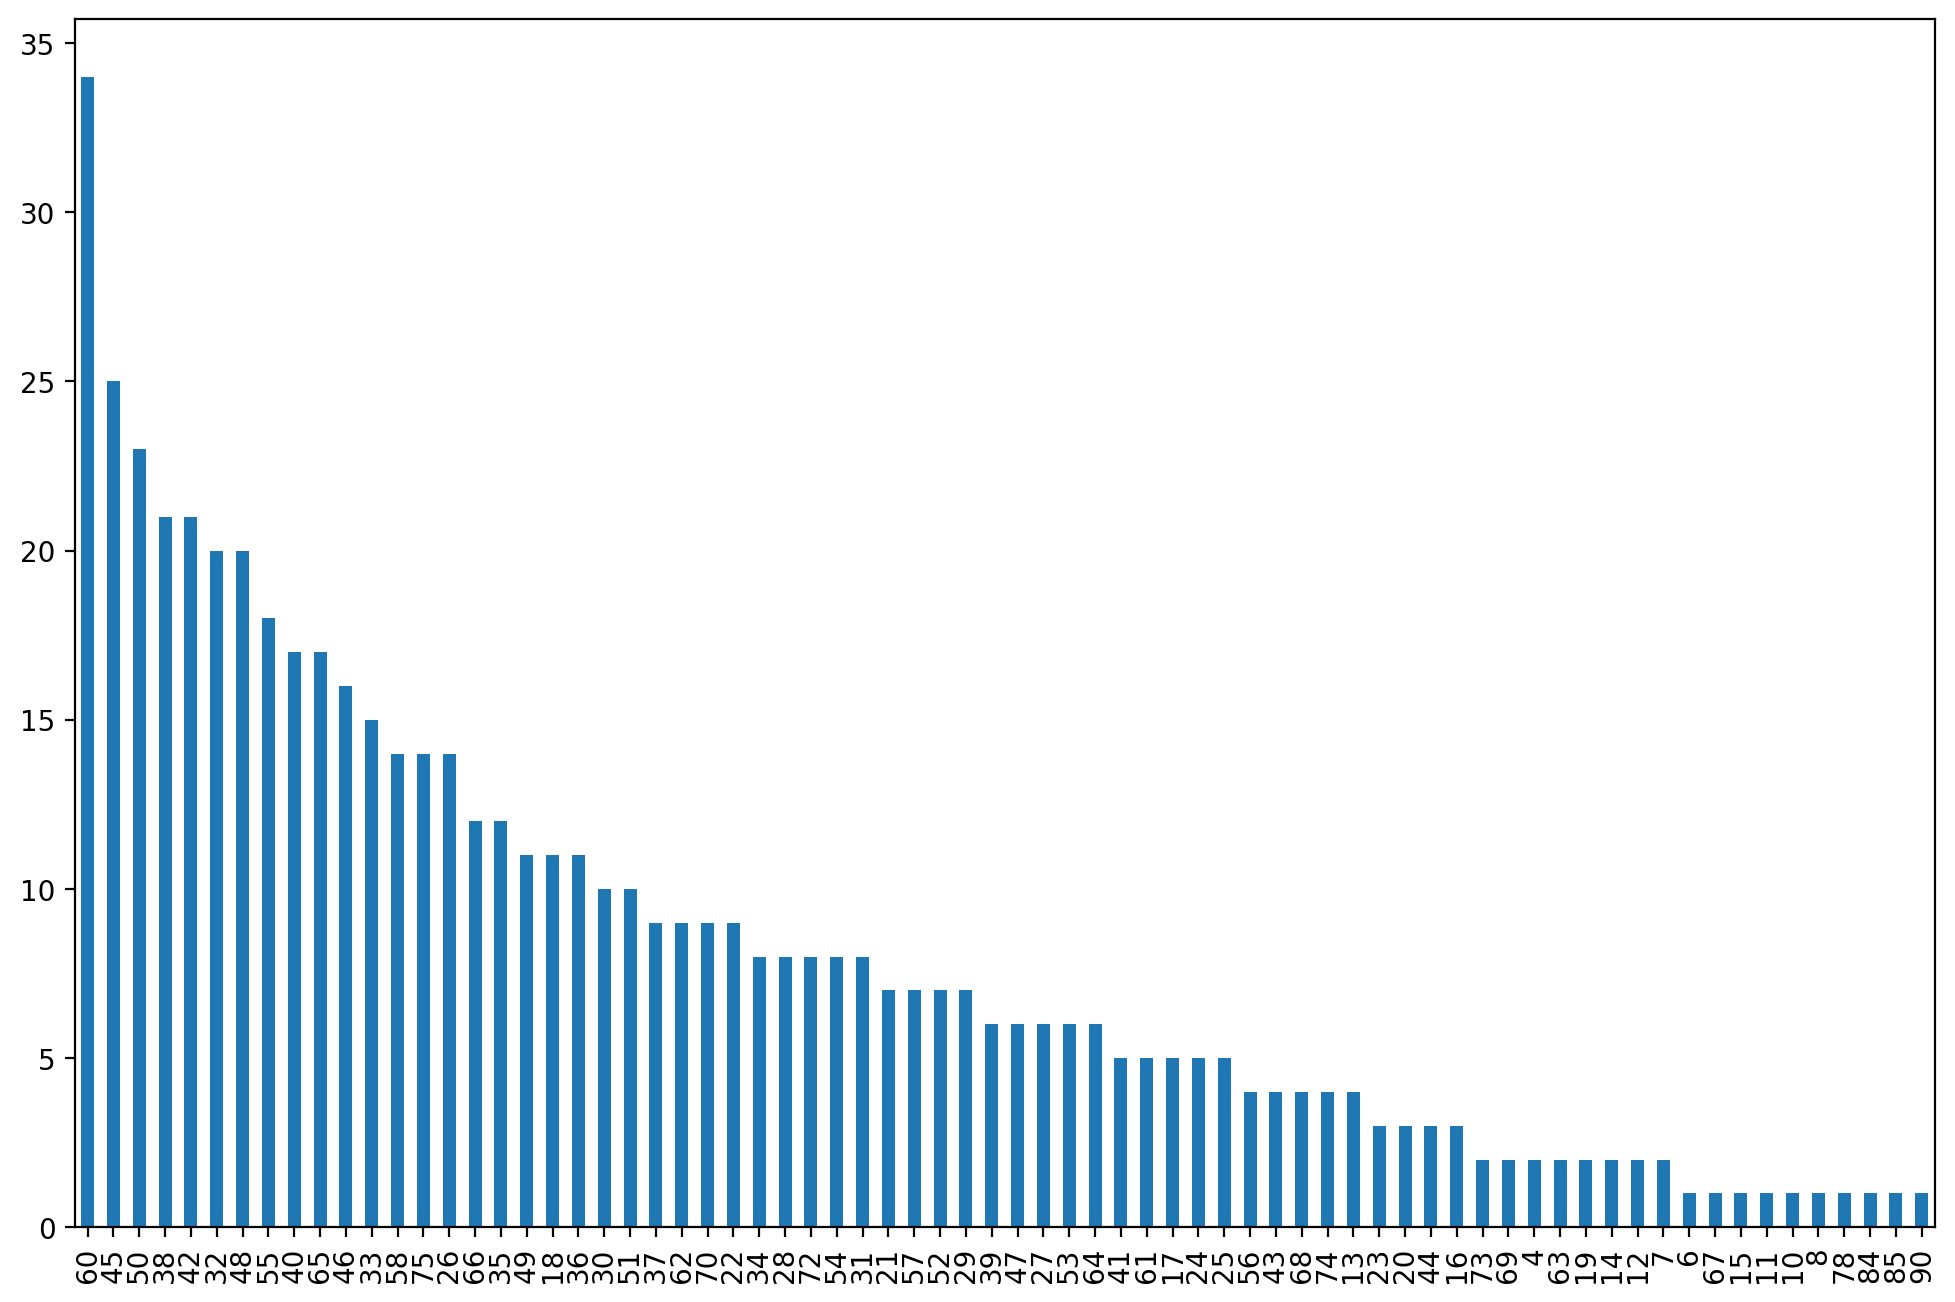

In [30]:
plt.figure(figsize=(12,8),dpi=200)
df['Age'].value_counts().plot(kind='bar')

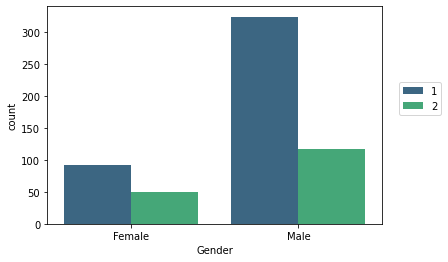

In [108]:
sns.countplot(data=df,x='Gender',hue='Dataset',palette='viridis')
plt.legend(loc=(1.05,0.5))

The dataset feaature has two value count first is 1 and secound 2 which is have disease and dont have disease respectively, and we can see here the male have more liver dieases and female have less disease as compare to male

In [22]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

# Feature Enginnering 

In [148]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [149]:
obj = df.select_dtypes(include='object')

In [150]:
obj = pd.get_dummies(obj,drop_first=True)

In [151]:
df_ = pd.concat([df.select_dtypes(exclude='object'),obj],axis=1)

In [152]:
X = df_.drop('Dataset',axis=1)

In [153]:
y = df_['Dataset']

# train test split

In [31]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Model creation

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

# LogisticRegression

In [158]:
Log = LogisticRegression(max_iter=100000)
Log.fit(X_train,y_train)
Log_pred = Log.predict(X_test)

In [160]:
print(classification_report(y_test,Log_pred))

              precision    recall  f1-score   support

           1       0.72      0.84      0.78       134
           2       0.42      0.25      0.32        59

    accuracy                           0.66       193
   macro avg       0.57      0.55      0.55       193
weighted avg       0.63      0.66      0.64       193



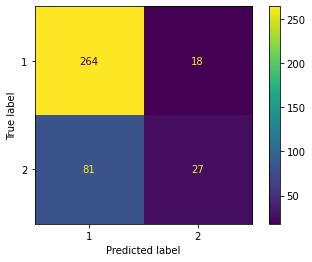

In [175]:
plot_confusion_matrix(Log,X_train,y_train)

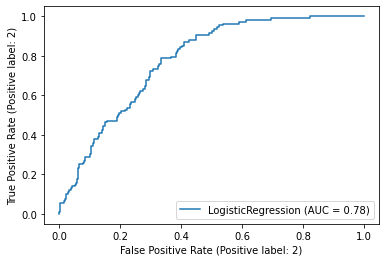

In [176]:
plot_roc_curve(Log,X_train,y_train)

# GradientBoostingClassifier

In [167]:
G = GradientBoostingClassifier(max_depth=5)
G.fit(X_train,y_train)
G_pred = G.predict(X_test)

In [168]:
print(classification_report(y_test,G_pred))

              precision    recall  f1-score   support

           1       0.78      0.83      0.80       134
           2       0.55      0.47      0.51        59

    accuracy                           0.72       193
   macro avg       0.67      0.65      0.66       193
weighted avg       0.71      0.72      0.71       193



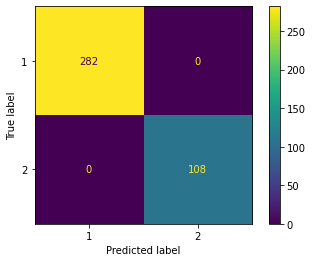

In [169]:
plot_confusion_matrix(G,X_train,y_train)

We can see here none missclassification here because it is too small dataset and Gredient boosting performed well 

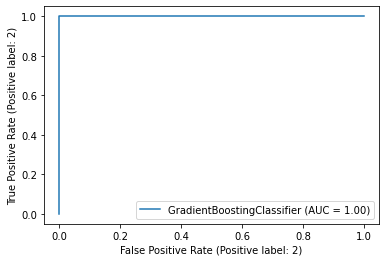

In [79]:
plot_roc_curve(G,X_train,y_train)

ROC curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.  

# Model Deployment

In [118]:
from joblib import dump,load

In [129]:
dump(G,'liver_patient.joblib')

['liver_patient.joblib']

In [172]:
sample = load('liver_patient.joblib')

In [173]:
G.feature_importances_

array([0.11364173, 0.11581167, 0.10923398, 0.17754977, 0.14428229,
       0.11434156, 0.0610194 , 0.09631197, 0.05235877, 0.01544885])

In [174]:
sample.feature_importances_

array([0.11376213, 0.11086152, 0.11584977, 0.17229198, 0.14807032,
       0.11241942, 0.06860279, 0.09671632, 0.04722459, 0.01420114])